Предсказываем стоимость машины по критериям

# МНК

In [ ]:
import pandas as pd
df_car_price=pd.read_csv("http://www.soshnikov.com/temp/data/CarPrice_Assignment.zip")

In [ ]:
import numpy as np
import math

Функция ошибки.

In [ ]:
# Mean Square Errop - среднеквадратичное отклонение
def MSE(x,y):
  return np.mean((x-y)**2)

# Mean Average Error - отклонение по модулю
def MAvE(x,y):
  return np.mean(np.abs(x-y))

# Mean Average Percentage Error - средняя абсолютная процентная ошибка
def MAPE(x,y):
  return np.mean(np.abs(x-y))/np.mean(y) #x - предсказываемое, у - целевое

Посчитаем корреляцию.

In [ ]:
df_car_price.corr()

<ipython-input-4-3504bf28c07d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_car_price.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<ipython-input-5-58c19f6eee74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_car_price.corr())


<Axes: >

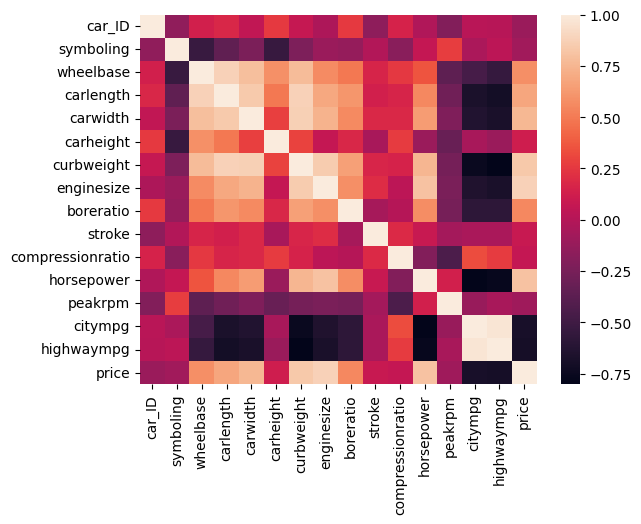

In [ ]:
import seaborn as sns
sns.heatmap(df_car_price.corr())

Интересует не вся корреляционная матрица, а только коррелирующие с ценой параметры.

In [ ]:
corr_with_price=df_car_price.corr()['price']
corr_with_price

<ipython-input-6-7b63d4d22aa9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_price=df_car_price.corr()['price']


car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

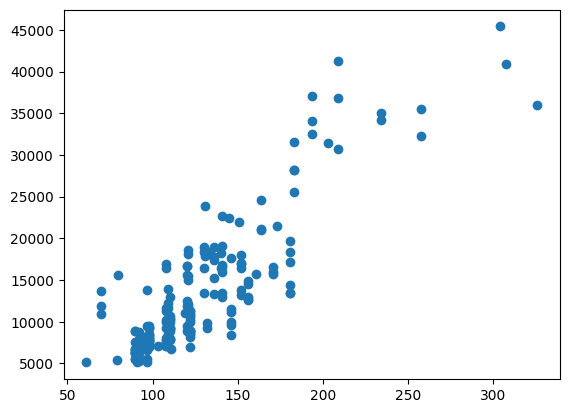

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_car_price['enginesize'], df_car_price['price'])

Далее требуется рассчитать оптимальный угол наклона прямой. Используем МНК

In [ ]:
X=df_car_price['enginesize']
Y=df_car_price['price']


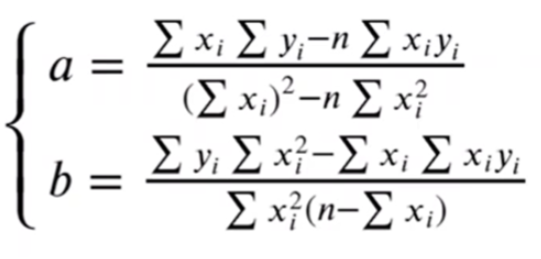

In [ ]:
n=len(X)
a=(X.sum()*Y.sum()-n*(X*Y).sum())/(X.sum()**2-n*(X**2).sum())
b=(Y.sum()-a*X.sum())/n
print(a, b)

167.698416393172 -8005.445531145186


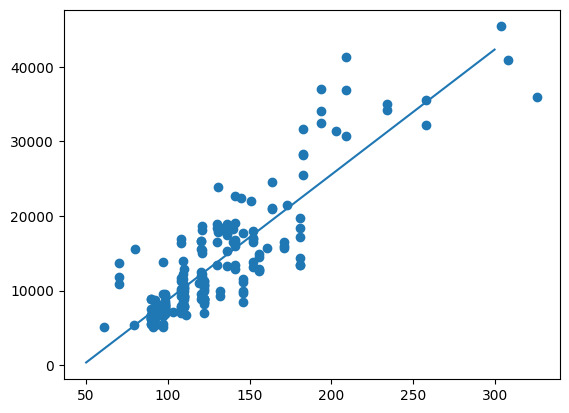

In [ ]:
x=np.array([50, 300]) #граничные значения х
plt.scatter(df_car_price['enginesize'], df_car_price['price'])
plt.plot(x,a*x+b)

In [ ]:
MAvE(a*X+b,Y)

2815.022353836412

# Градиентный спуск (Dradient Desent)

Посчитаем производную: численные значения.

In [ ]:
def d(f,x, dx=0.01):
  return (f(x+dx)-f(x))/dx
# X может быть вектором
d(lambda x: x*X+b,X)
# производная по х

0      130.0
1      130.0
2      152.0
3      109.0
4      136.0
       ...  
200    141.0
201    141.0
202    173.0
203    145.0
204    141.0
Name: enginesize, Length: 205, dtype: float64

In [ ]:
a=b=0 # начальные значения
eta=0.00005 # шаг обучения
for i in range(20000):
  if i%1000==0:
    print(f"a={a}, b={b}, MSE={MSE(a*X+b,Y)}")
  # меняем a и b - вычитаем eta * на производную функции ошибки по а или b
  a=a-eta*d(lambda t: MSE(t*X+b,Y), a)
  b=b-eta*d(lambda t: MSE(a*X+t,Y), b)

a=0, b=0, MSE=239781479.49114093
a=111.26957909135139, b=-77.6531013350933, MSE=21062729.463133473
a=111.81258032124467, b=-153.9471151153182, MSE=20946222.144718744
a=112.35035162562475, b=-229.50630181254775, MSE=20831947.38648691
a=112.88294337658176, b=-304.337738928422, MSE=20719862.398483776
a=113.41040546113578, b=-378.4484357947111, MSE=20609925.210969184
a=113.93278728567005, b=-451.845334233902, MSE=20502094.658688214
a=114.45013778096015, b=-524.5353092074206, MSE=20396330.365452603
a=114.96250540617812, b=-596.5251694597299, MSE=20292592.72901486
a=115.469938153978, b=-667.8216581584314, MSE=20190842.906228956
a=115.97248355464966, b=-738.4314535234107, MSE=20091042.798502527
a=116.47018868083079, b=-808.3611694521817, MSE=19993155.037524577
a=116.9631001517356, b=-877.6173561430892, MSE=19897142.97126144
a=117.45126413747617, b=-946.2065007017909, MSE=19802970.65023611
a=117.93472636349476, b=-1014.1350277583659, MSE=19710602.814047746
a=118.41353211501578, b=-1081.4093000

К нужным а и b не пришли из-за слишком большого разброса значений (price и enginesize), поэтому масштабируем.

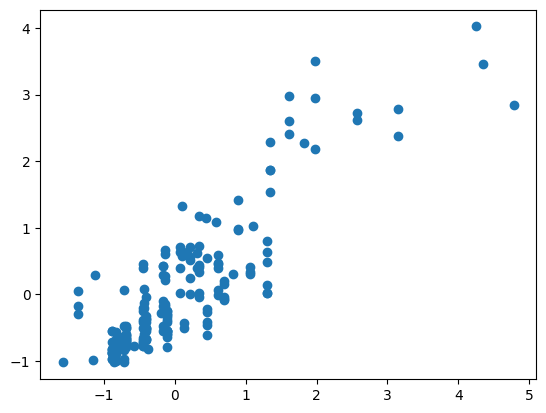

In [ ]:
X_scaled=(X-X.mean())/X.std() # деленное на среднеквадратичное отклонение
Y_scaled=(Y-Y.mean())/Y.std()
plt.scatter(X_scaled,Y_scaled) # такой же набор точек, только смаштабированный

In [ ]:
a_scaled=b_scaled=0
eta=0.2
for i in range(10):
  print(f"a_scaled={a_scaled}, b_scaled={b_scaled}, MSE={MSE(a_scaled*X_scaled+b_scaled,Y_scaled)}")
  a_scaled=a_scaled-eta*d(lambda t: MSE(t*X_scaled+b_scaled,Y_scaled), a_scaled)
  b_scaled=b_scaled-eta*d(lambda t: MSE(a_scaled*X_scaled+t,Y_scaled), b_scaled)

a_scaled=0, b_scaled=0, MSE=0.995121951219512
a_scaled=0.3459620287121967, b_scaled=-0.002000000000002, MSE=0.5123404535676902
a_scaled=0.5542142938004146, b_scaled=-0.00320000000000209, MSE=0.3365867497799792
a_scaled=0.6795719987364468, b_scaled=-0.00392000000000059, MSE=0.2724095410314124
a_scaled=0.7550312220979405, b_scaled=-0.0043519999999996895, MSE=0.24885804960804675
a_scaled=0.8004539936238336, b_scaled=-0.00461119999999926, MSE=0.24014538367913263
a_scaled=0.8277962863374694, b_scaled=-0.004766719999999558, MSE=0.23688070225913432
a_scaled=0.8442550127807025, b_scaled=-0.0048600319999991815, MSE=0.23563293603330218
a_scaled=0.8541623632348239, b_scaled=-0.004916019199999733, MSE=0.23514179196802876
a_scaled=0.8601261049228165, b_scaled=-0.004949611519999841, MSE=0.23494033852138593


Учет нескольких признаков

In [ ]:
X=df_car_price[['enginesize', 'highwaympg', 'wheelbase']]
Y=df_car_price['price']
X_scaled=(X-X.mean())/X.std()
Y_scaled=(Y-Y.mean())/Y.std()

In [ ]:
a_scaled=np.random.normal(size=3) # рандомный вектор с нормальным распределением
b_scaled=0
eta=0.2
for i in range(100):
  if i%10==0:
    print(f"MSE={MSE(X_scaled@a_scaled+b_scaled,Y_scaled)}")
  a_scaled=a_scaled-eta*((X_scaled@a_scaled+b_scaled-Y_scaled)*X_scaled.T).mean(axis=1)
  b_scaled=b_scaled-eta*(X_scaled@a_scaled-Y_scaled).mean() # по-другому посчитали производную

MSE=3.4570940869570213
MSE=0.673591610968048
MSE=0.3293670964600805
MSE=0.2415691354719341
MSE=0.21867400386900043
MSE=0.21263425928235052
MSE=0.21103156784964436
MSE=0.2106050212937915
MSE=0.2104913306017159
MSE=0.21046100545104762


In [ ]:
MAvE(Y_scaled, X_scaled@a_scaled+b_scaled)*Y.std()

2619.0718900307343

# Scikit-Learn

То же самое, только не руками, а с использованием специальной библиотеки Scikit-Learn.

In [ ]:
from sklearn.linear_model import LinearRegression
features=['enginesize', 'highwaympg', 'wheelbase']
X=df_car_price[features]
Y=df_car_price['price']
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

Получили модель для предсказаний. Предсказываем:

In [ ]:
 Y_pred=model.predict(X)
 MAvE(Y_pred, Y)

2618.4023664841657

Поделим датасет на тестовый и обучающий

In [ ]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df_car_price, test_size=0.2, shuffle=True)
#shuffle - перемешать перед разбиением
X_train= train[features]
Y_train= train['price']
X_test= test[features]
Y_test= test['price']

In [ ]:
model=LinearRegression().fit(X_train,Y_train)
Y_pred=model.predict(X_test)
MAvE(Y_pred, Y_test)

3050.071584493284

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print(f"MAE={mean_absolute_error(Y_test, Y_pred)}")
print(f"MAPE={mean_absolute_percentage_error(Y_test, Y_pred)}")
print(f"MSE={mean_squared_error(Y_test, Y_pred)}")
print(f"RMSE={math.sqrt(mean_squared_error(Y_test, Y_pred))}")

MAE=3050.071584493284
MAPE=0.2421718696304985
MSE=17010468.608508423
RMSE=4124.374935491246


# Учет нечисловых признаков

#### Категориальные

Рассмотрим aspiration и carbody

In [ ]:
df_car_price['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [ ]:
df_car_price.groupby('carbody').mean()['price']

<ipython-input-25-a432f268ea1d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_car_price.groupby('carbody').mean()['price']


carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

In [ ]:
import sklearn
ohe=sklearn.preprocessing.OneHotEncoder()
ohe.fit(df_car_price[['carbody', 'aspiration']])
# fit - обучиться на данных

OneHotEncoder()

In [ ]:
ohe.transform(df_car_price[['carbody', 'aspiration']]).todense()

matrix([[1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

#### Порядковые

label encoding

In [ ]:
le=sklearn.preprocessing.LabelEncoder()
le.fit(df_car_price['aspiration'])
le.classes_

array(['std', 'turbo'], dtype=object)

In [ ]:
le.transform(df_car_price['aspiration'])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1])

Учтем бренд машины

In [ ]:
df_car_price['Brand']=df_car_price['CarName'].apply(lambda x: x.split()[0]
                                                    .lower()
                                                    .replace('maxda','mazda')
                                                    .replace('vw','volskwagen')
                                                    .replace('volskwagen','volkswagen')
                                                    .replace('vokswagen','volkswagen')
                                                    .replace('porcshce', 'porsche')
                                                    .replace('toyouta', 'toyota')
                                                    )
df_car_price['Brand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Brand, dtype: int64

In [ ]:
brands_by_price=list(df_car_price.groupby('Brand').mean()['price'].sort_values().index)
brands_by_price

<ipython-input-31-a0bcc4030ca3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brands_by_price=list(df_car_price.groupby('Brand').mean()['price'].sort_values().index)


['chevrolet',
 'dodge',
 'plymouth',
 'honda',
 'subaru',
 'isuzu',
 'mitsubishi',
 'renault',
 'toyota',
 'volkswagen',
 'nissan',
 'mazda',
 'saab',
 'peugeot',
 'alfa-romero',
 'mercury',
 'audi',
 'volvo',
 'bmw',
 'porsche',
 'buick',
 'jaguar']

Для начала опишем все фичи.

In [ ]:
all_features=['symboling','Brand','fueltype','aspiration','doornumber',
              'carbody','drivewheel','enginelocation','wheelbase','carlength',
              'carwidth','carheight','curbweight','enginetype','fuelsystem',
              'cylindernumber','enginesize','boreratio','stroke','compressionratio',
              'horsepower','peakrpm','citympg','highwaympg']
df_car_price[all_features]

,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,four,130,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,four,130,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,six,152,2.68,3.47,9.0,154,5000,19,26
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,four,109,3.19,3.40,10.0,102,5500,24,30
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,five,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,four,141,3.78,3.15,9.5,114,5400,23,28
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,four,141,3.78,3.15,8.7,160,5300,19,25
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,six,173,3.58,2.87,8.8,134,5500,18,23
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,six,145,3.01,3.40,23.0,106,4800,26,27


Выбираем кого как кодировать.

*   Sklearn позволяет обучить один трансормер, выполняющий все преобразования с таблицей
*   OneHotEncoder, LabelEncoder, OrdinalEncoder (LabelEncoder, но получше работающий в составе трансформеров)
*   Масштабируют: StandardScaler (вычитает среднее и делит на дисперсию), MinMaxScaler (линейно масштабирует от 0 до 1)


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
num_features=['enginesize','wheelbase','horsepower','highwaympg','compressionratio']
train, test= train_test_split(df_car_price, test_size=0.2, shuffle=True)
transformer=make_column_transformer(
    (OrdinalEncoder(),['Brand', 'doornumber']),
    (OneHotEncoder(),['carbody']),
    (StandardScaler(),num_features)
)

transformer.fit(train)

ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['Brand', 'doornumber']),
                                ('onehotencoder', OneHotEncoder(), ['carbody']),
                                ('standardscaler', StandardScaler(),
                                 ['enginesize', 'wheelbase', 'horsepower',
                                  'highwaympg', 'compressionratio'])])

Данные, готовые к употреблению:

In [ ]:
X_ted=transformer.transform(train)
Y_ted=train['price']
model=LinearRegression().fit(X_ted,Y_ted)

In [ ]:
Y_pred_ted=model.predict(transformer.transform(test))
mean_absolute_error(test['price'], Y_pred_ted)

2345.092148130242

Коэффициенты при разных параметрах модели.

In [ ]:
model.coef_

array([ -172.11569299,  -374.37222323,  4023.85335237,  1572.42566985,
       -2329.14932375, -1104.09012521, -2163.03957326,  2565.73911693,
        1332.09887495,  3700.46286547,  -378.55607422,   839.5998669 ])

Парамерты.

In [ ]:
transformer.transformers_[1][1].get_feature_names_out()

array(['carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon'], dtype=object)

Есть некоторые поля, которые надо убрать: drop

In [ ]:
transformer.transformers_

[('ordinalencoder', OrdinalEncoder(), ['Brand', 'doornumber']),
 ('onehotencoder', OneHotEncoder(), ['carbody']),
 ('standardscaler',
  StandardScaler(),
  ['enginesize', 'wheelbase', 'horsepower', 'highwaympg', 'compressionratio']),
 ('remainder',
  'drop',
  [0, 1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 22, 23, 25])]

In [ ]:
def get_feature_names(trans):
  res=[]
  for t in trans.transformers_:
    if isinstance(t[1], OneHotEncoder):
        res.extend(t[1].get_feature_names_out())
    elif t[1]=='drop':
        pass
    else:
      res.extend(t[2])
  return res

feature_names=get_feature_names(transformer)
feature_names

['Brand',
 'doornumber',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'enginesize',
 'wheelbase',
 'horsepower',
 'highwaympg',
 'compressionratio']

In [ ]:
list(zip(feature_names, model.coef_))

[('Brand', -172.1156929934895),
 ('doornumber', -374.37222323052674),
 ('carbody_convertible', 4023.853352366756),
 ('carbody_hardtop', 1572.4256698523134),
 ('carbody_hatchback', -2329.1493237488644),
 ('carbody_sedan', -1104.090125212026),
 ('carbody_wagon', -2163.039573258183),
 ('enginesize', 2565.739116933516),
 ('wheelbase', 1332.0988749522196),
 ('horsepower', 3700.4628654734283),
 ('highwaympg', -378.55607422341177),
 ('compressionratio', 839.5998668950655)]